In [16]:
! pip install pandas

  Using cached https://files.pythonhosted.org/packages/c1/cf/58ccaa38d5670dd4d2aee5df90aa03d670ede3947b7148e72391c80d4f91/pandas-0.25.0-cp37-cp37m-win_amd64.whl


In [1]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.
c:\users\kehua\.conda\envs\kerasnew\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\kehua\.conda\envs\kerasnew\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\kehua\.conda\envs\kerasnew\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\kehua\.conda\envs\kerasnew\lib\site-pa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [2]:
from keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test, y_test)) = load_data()

In [3]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)

訓練的維度: (50000, 32, 32, 3)
測試的維度: (10000, 32, 32, 3)


In [4]:
mapdict = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",
           7:"馬", 8:"船", 9:"貨車"}

標籤: 汽車


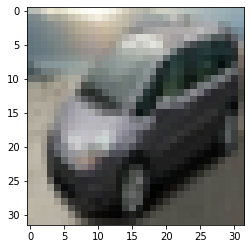

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("標籤:", mapdict[y_train[c][0]])
plt.imshow(x_train[c])

In [6]:
# normalize: (0~1)
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
cnn = Sequential()
# 第一層: 把input shape設好
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               kernel_size=(3, 3), 
               filters=32, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=128, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation="relu"))
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [8]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

W0811 22:20:30.660213 26732 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\kerasnew\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = cnn.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=10, validation_split=0.1, verbose=2)

W0811 22:20:37.481092 26732 deprecation.py:323] From c:\users\kehua\.conda\envs\kerasnew\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 30s - loss: 1.5777 - acc: 0.4321 - val_loss: 1.2786 - val_acc: 0.5468
Epoch 2/10
 - 30s - loss: 1.2065 - acc: 0.5725 - val_loss: 1.0696 - val_acc: 0.6262
Epoch 3/10
 - 30s - loss: 1.0249 - acc: 0.6394 - val_loss: 0.9635 - val_acc: 0.6680
Epoch 4/10
 - 30s - loss: 0.9021 - acc: 0.6854 - val_loss: 0.8850 - val_acc: 0.6936
Epoch 5/10
 - 30s - loss: 0.8116 - acc: 0.7187 - val_loss: 0.8301 - val_acc: 0.7172
Epoch 6/10
 - 30s - loss: 0.7462 - acc: 0.7396 - val_loss: 0.8123 - val_acc: 0.7212
Epoch 7/10
 - 30s - loss: 0.6709 - acc: 0.7653 - val_loss: 0.8469 - val_acc: 0.7160
Epoch 8/10
 - 30s - loss: 0.6237 - acc: 0.7834 - val_loss: 0.7719 - val_acc: 0.7364
Epoch 9/10
 - 30s - loss: 0.5597 - acc: 0.8051 - val_loss: 0.7438 - val_acc: 0.7434
Epoch 10/10
 - 30s - loss: 0.4970 - acc: 0.8271 - val_loss: 0.7611 - val_acc: 0.7440


In [10]:
cnn.evaluate(x_test_shape, y_test_onehot)

10000/10000 [==============================] - 3s 320us/step


[0.7908793225288391, 0.7279]

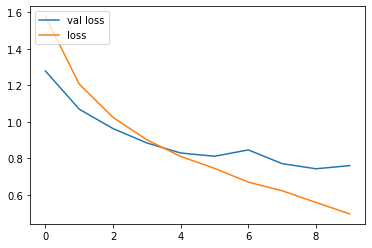

In [11]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [15]:
import pandas as pd
# {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",7:"馬", 8:"船", 9:"貨車"}
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(cnn.predict_classes(x_test_shape), y_test))

ModuleNotFoundError: No module named 'pandas'